In [67]:
%cd ../..
%load_ext autoreload
%autoreload 2
%matplotlib inline
import datajoint as dj; dj.conn().connect()
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
from pipeline import lab, get_schema_name, experiment, foraging_model, ephys, foraging_analysis, histology, ccf
from pipeline.plot import unit_psth
from pipeline.plot.foraging_model_plot import plot_session_model_comparison, plot_session_fitted_choice
import pandas as pd

/
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### The new session I selected

In [68]:
session = experiment.Session & (lab.WaterRestriction & 'water_restriction_number = "HH07"') & 'session = 25' 

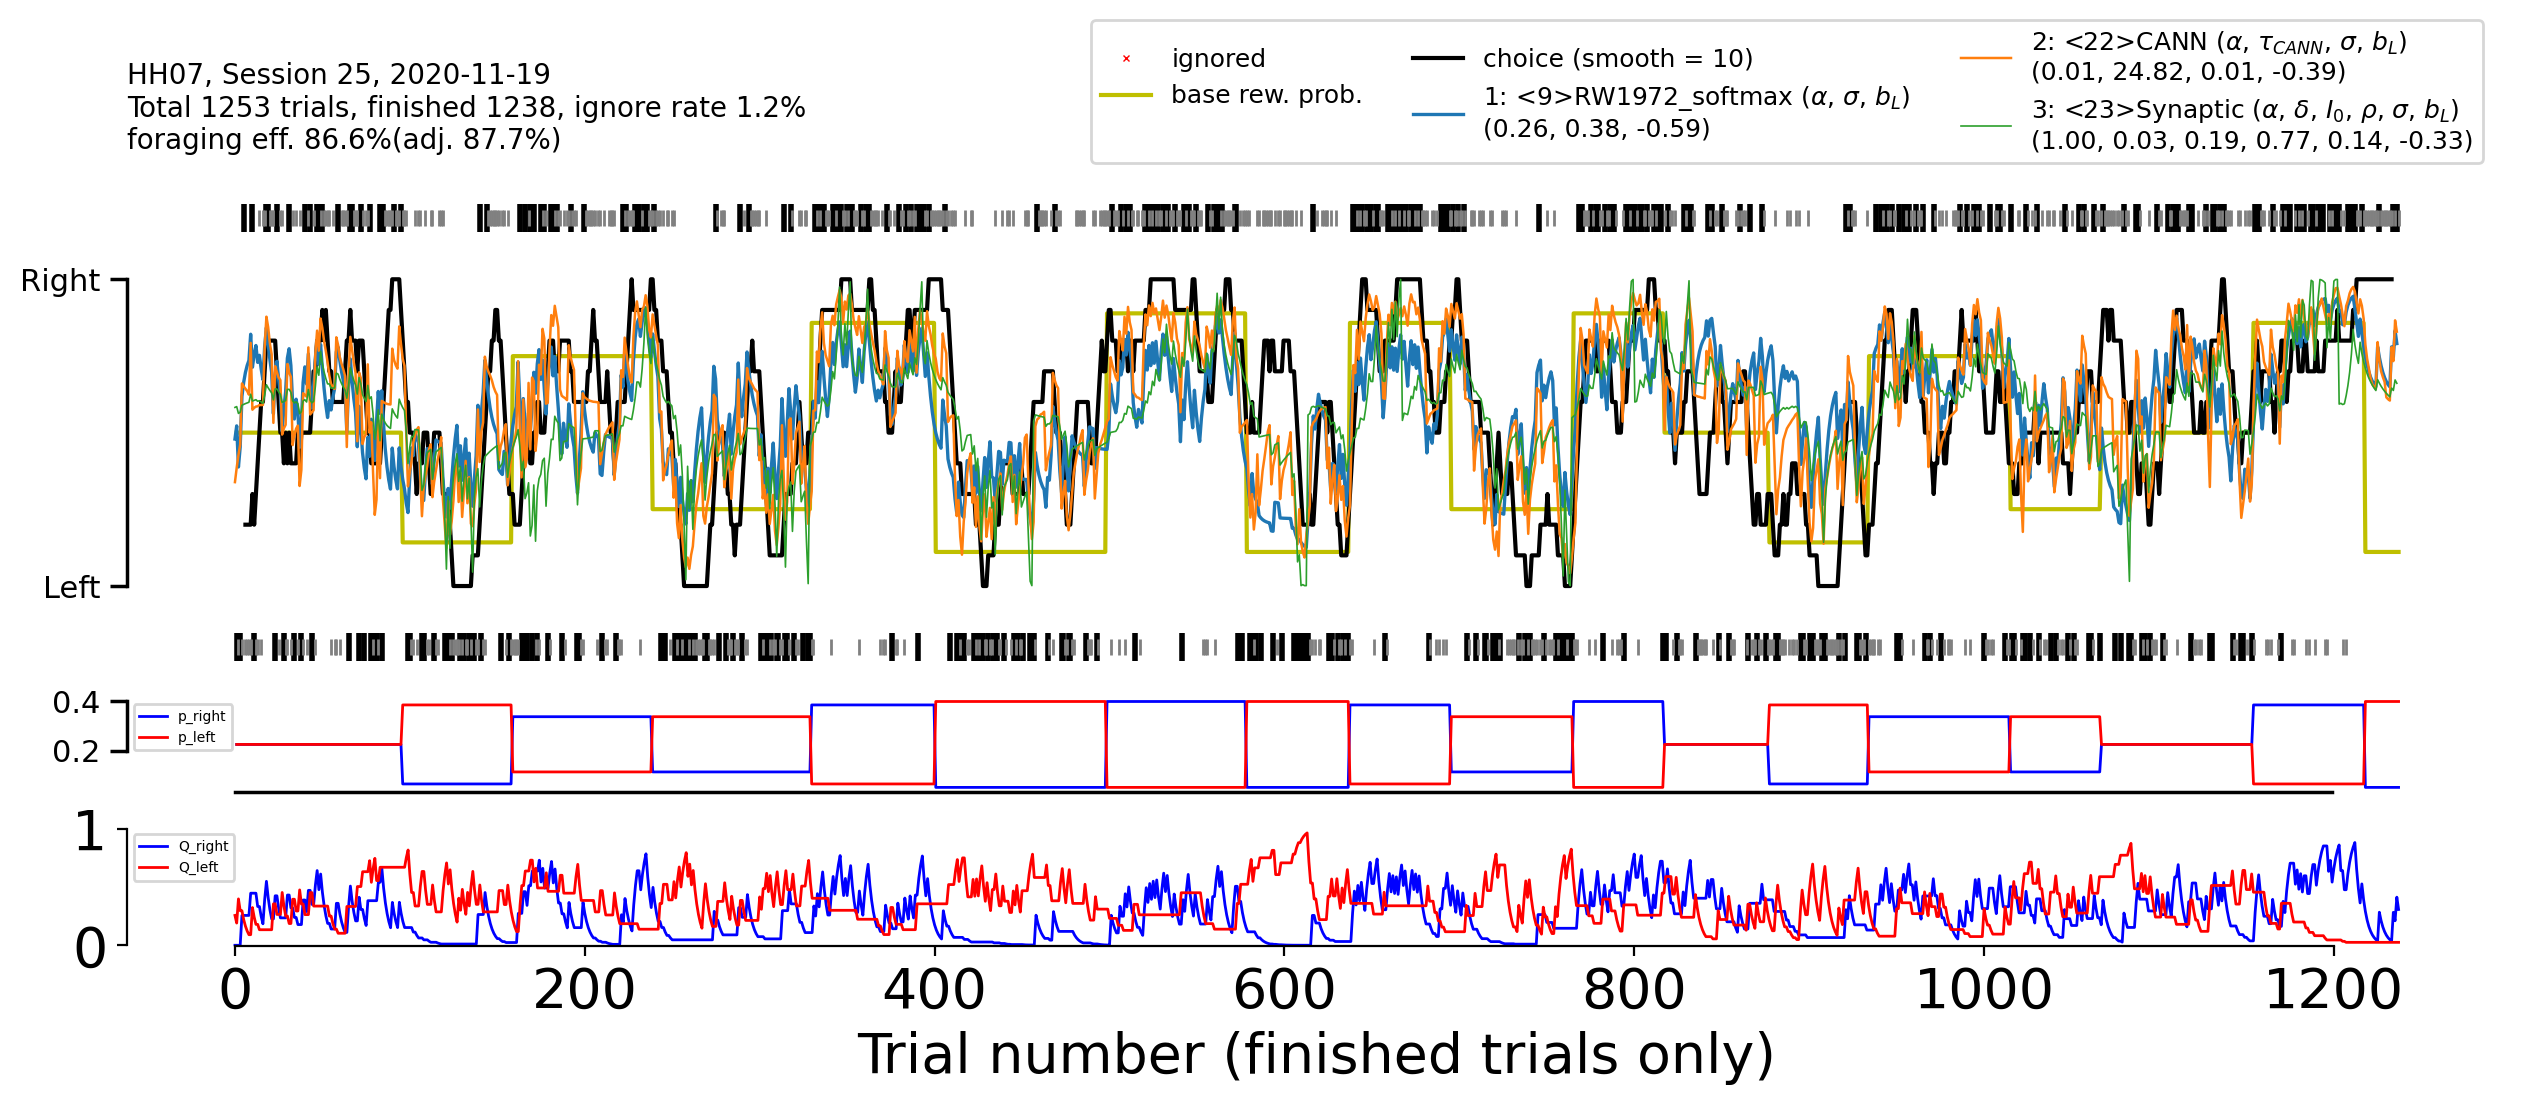

In [69]:
plot_session_fitted_choice(sess_key=session.fetch1('KEY'), specified_model_ids=[9, 22, 23], smooth_factor=10);

### Get real fitted parameters (the ones in the plots were rounded numbers)

In [70]:
foraging_model.FittedSessionModel.Param & session & 'model_id in (22, 23)'   # 22: network model; 23: synaptic model

subject_id institution 6 digit animal ID,session session number,model_id,"model_param e.g. learn_rate, epsilon, w_tau1",fitted_value
472184,25,22,biasL,-0.387363
472184,25,22,learn_rate,0.0109664
472184,25,22,softmax_temperature,0.0103797
472184,25,22,tau_cann,24.8154
472184,25,23,biasL,-0.332119
472184,25,23,forget_rate,0.0272362
472184,25,23,I0,0.187917
472184,25,23,learn_rate,0.999995
472184,25,23,rho,0.772823
472184,25,23,softmax_temperature,0.14298


## Get Qs

#### Network model

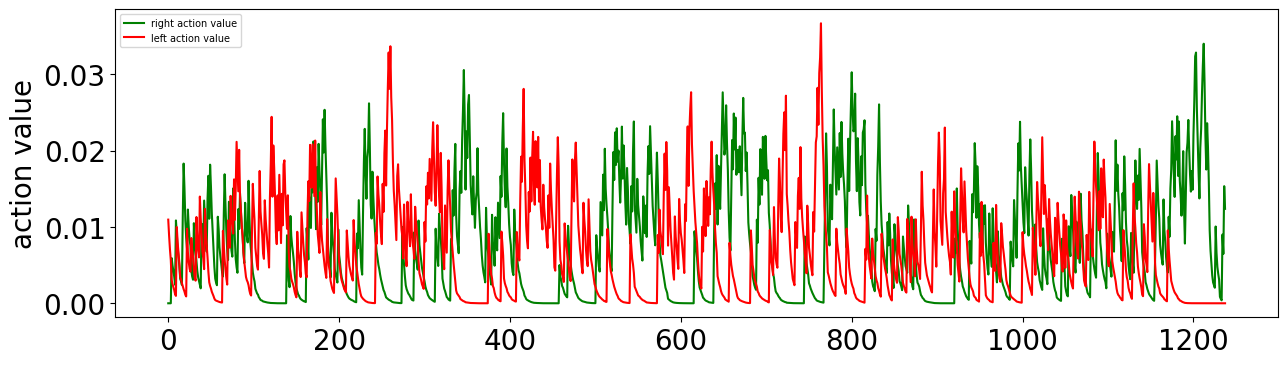

In [71]:
latent_variables = foraging_model.FittedSessionModel.TrialLatentVariable & session & 'model_id = 22'
right_action_value = (latent_variables & 'water_port = "right"').fetch('action_value')
left_action_value = (latent_variables & 'water_port = "left"').fetch('action_value')

fig, ax2 = plt.subplots(1, 1, figsize=(15, 4))
ax2.plot(right_action_value, 'g', label='right action value')
ax2.plot(left_action_value, 'r', label='left action value')
ax2.set_ylabel('action value')
ax2.legend(fontsize=7)

#### Synaptic model

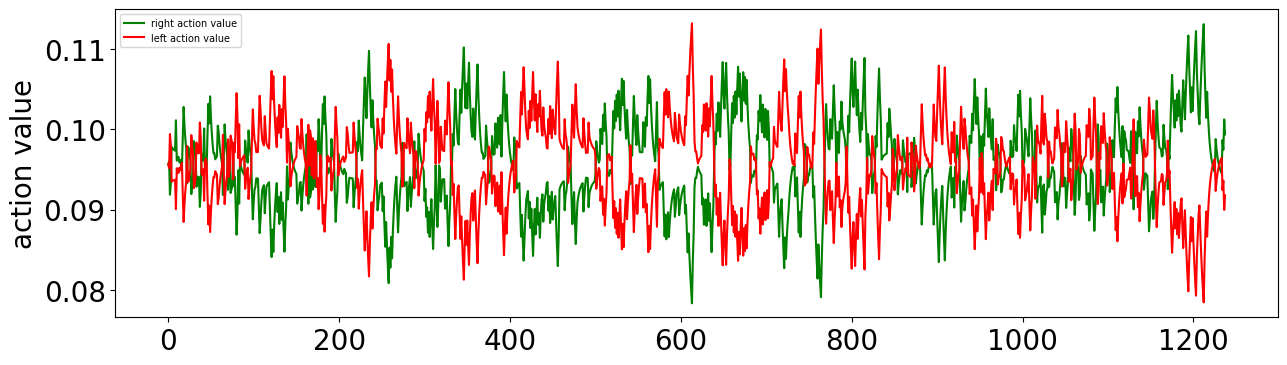

In [73]:
latent_variables = foraging_model.FittedSessionModel.TrialLatentVariable & session & 'model_id = 24'
right_action_value = (latent_variables & 'water_port = "right"').fetch('action_value')
left_action_value = (latent_variables & 'water_port = "left"').fetch('action_value')

fig, ax2 = plt.subplots(1, 1, figsize=(15, 4))
ax2.plot(right_action_value, 'g', label='right action value')
ax2.plot(left_action_value, 'r', label='left action value')
ax2.set_ylabel('action value')
ax2.legend(fontsize=7)